# 6.5 Machine Learning Part 2

## Importing Libraries and Data 

In [1]:
#Imported Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Imported path
path = r'/Users/racheldurand/Desktop/Data Analytics/Achievement 6'

In [4]:
path

'/Users/racheldurand/Desktop/Data Analytics/Achievement 6'

In [5]:
#Imported Adidas US Sales Dataset.csv
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'df_adidas_US_clean.csv'), index_col = False)

## Data Cleaning

In [6]:
#Checked head
df.head()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Invoice Year,Invoice Month
0,Foot Locker,1/1/20,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store,2020,1
1,Foot Locker,1/2/20,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store,2020,1
2,Foot Locker,1/3/20,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,2020,1
3,Foot Locker,1/4/20,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,2020,1
4,Foot Locker,1/5/20,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store,2020,1


In [7]:
#Checked shape
df.shape

(9648, 14)

In [8]:
#Deleted unnecessary columns and categorical columns since analysis requires numerical columns only
df = df.drop(columns=['Invoice Date', 'Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method'])

In [9]:
df.columns

Index(['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'Operating Margin', 'Invoice Year', 'Invoice Month'],
      dtype='object')

In [10]:
#Rechecked shape
df.shape

(9648, 7)

In [11]:
#Checked for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9643    False
9644    False
9645    False
9646    False
9647    False
Length: 9648, dtype: bool

In [12]:
#Checked for missing values 
df.isnull().sum()

Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Invoice Year        0
Invoice Month       0
dtype: int64

## The Elbow Technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/racheldurand/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/racheldurand/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/racheldurand/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/racheldurand/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-222624751285827.84,
 -58094556372617.76,
 -25608350472113.152,
 -15437755651301.518,
 -10353434948666.764,
 -7773293407054.16,
 -6071641044053.829,
 -5131453068536.652,
 -4463596327930.516]

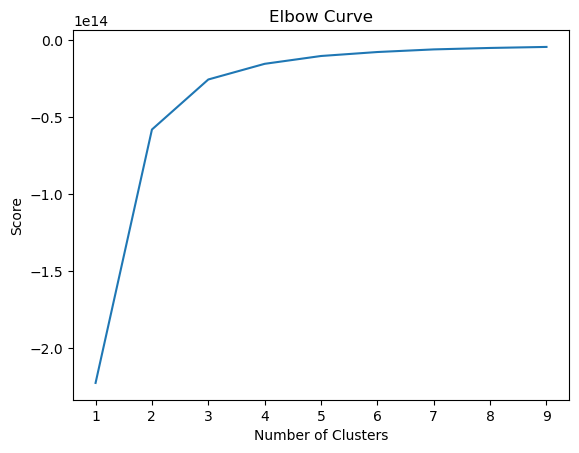

In [15]:
# Plotted the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Seen in the graph there is a jump from two to three on the x-axis, but after the curves straighten outs. Given this analaysis, the optinal count for the clusters is 3.

## K-Means Clustering

In [16]:
# Created the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [17]:
# Fitted the k-means object to the data.

kmeans.fit(df)

/Users/racheldurand/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [18]:
#Created a new column clusters
df['clusters'] = kmeans.fit_predict(df)

/Users/racheldurand/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
df.head()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Invoice Year,Invoice Month,clusters
0,50,1200,600000,300000,0.50,2020,1,1
1,50,1000,500000,150000,0.30,2020,1,1
2,40,1000,400000,140000,0.35,2020,1,1
3,45,850,382500,133875,0.35,2020,1,1
4,60,900,540000,162000,0.30,2020,1,1


In [20]:
df['clusters'].value_counts()

0    6744
2    2058
1     846
Name: clusters, dtype: int64

## Visulization of Clusters

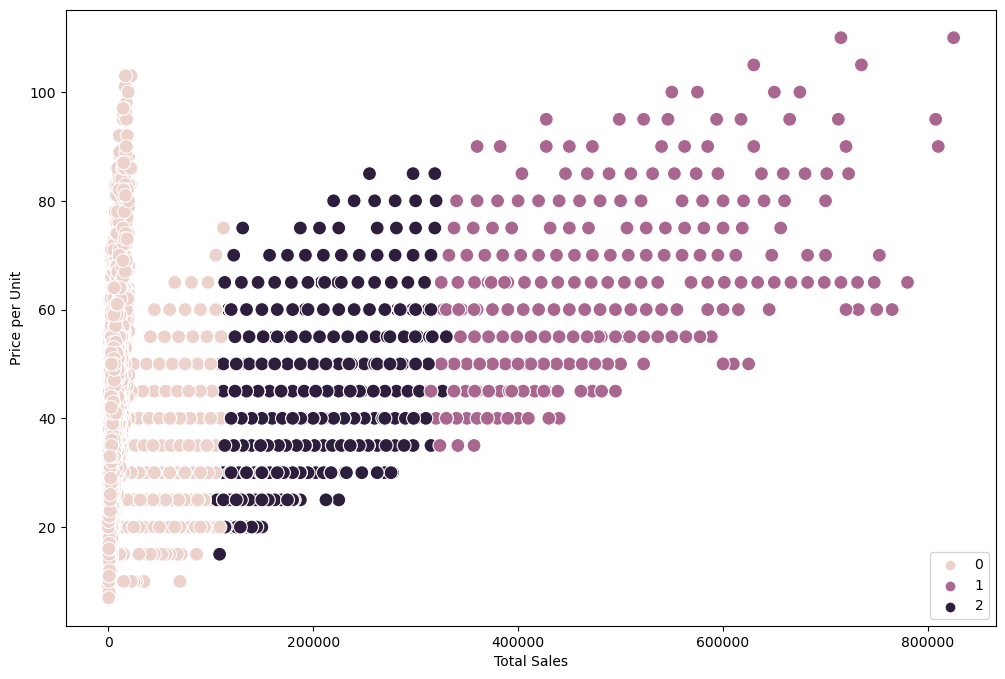

In [21]:
# Plot the clusters for the "Price per Unit" and "Total Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Sales'], y=df['Price per Unit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Sales') # Label x-axis.
plt.ylabel('Price per Unit') # Label y-axis.
plt.show()

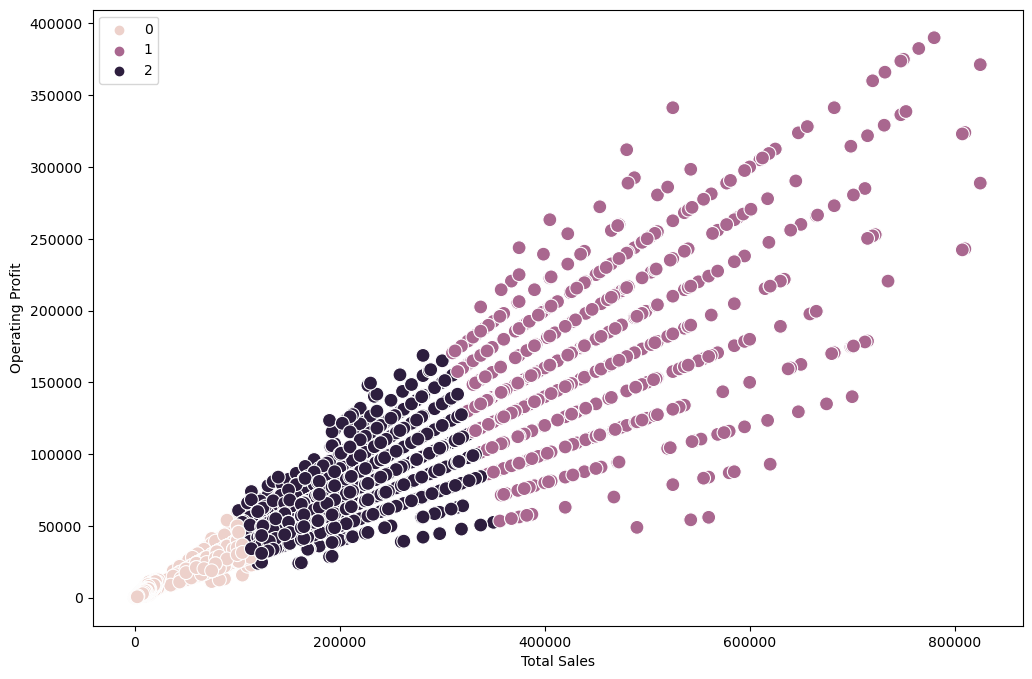

In [22]:
# Plot the clusters for the "Operating Profit" and "Total Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Sales'], y=df['Operating Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Sales') # Label x-axis.
plt.ylabel('Operating Profit') # Label y-axis.
plt.show()

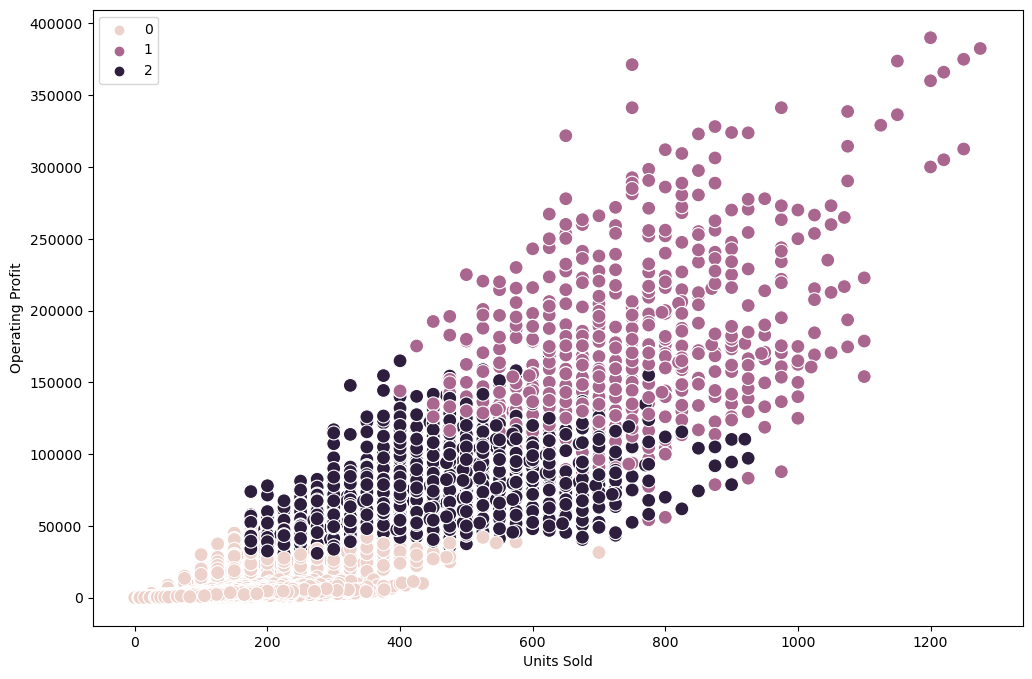

In [23]:
# Plot the clusters for the "Operating Profit" and "Units Sold" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Units Sold'], y=df['Operating Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Units Sold') # Label x-axis.
plt.ylabel('Operating Profit') # Label y-axis.
plt.show()

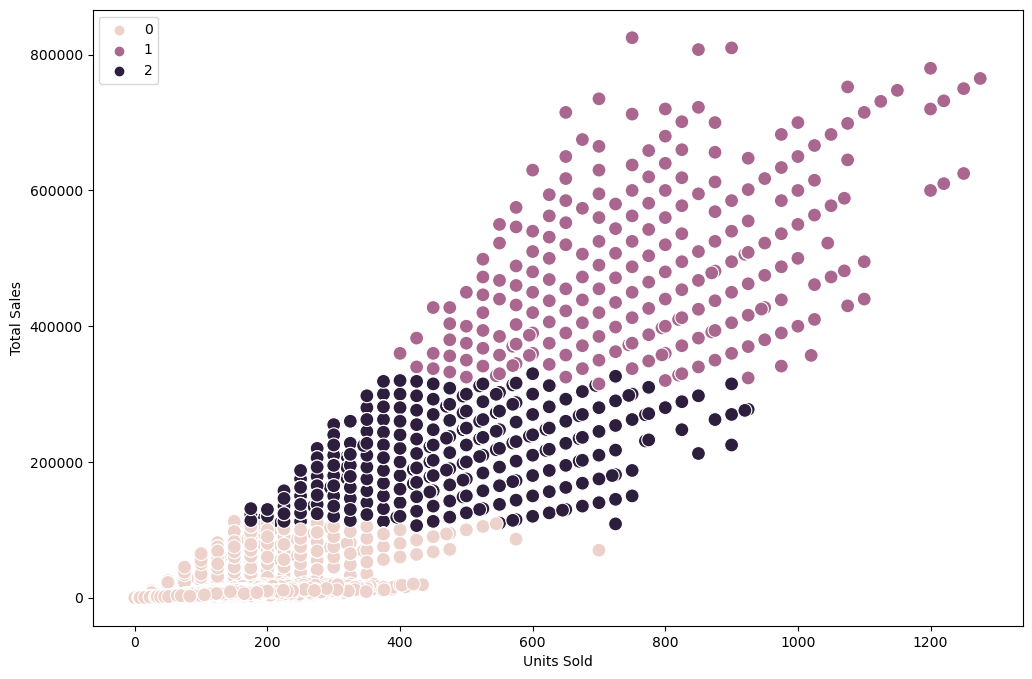

In [24]:
# Plot the clusters for the "Total Sales" and "Units Sold" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Units Sold'], y=df['Total Sales'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Units Sold') # Label x-axis.
plt.ylabel('Total Sales') # Label y-axis.
plt.show()

### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

The first scatterplot "Price per Unit" and "Total Sales" show that cluster 0 is the most populated cluster. There are many data points in this cluster where there are 0 total sales resulting in a high price per unit. Cluster 2 is the second most populated cluster, showcasing that as total sales increase the price per unit increases as well. This follows into cluster 1 where as sales increase past $400,000 the price per unit also increases significantly.

The next scatterplots 2-4:

- "Operating Profit" and "Total Sales"
- "Operating Profit" and "Units Sold"
- "Total Sales" and "Units Sold" 

each share similar results. Observed by each of these clusters you can see an upward trend between both the x-axis and y-axis. As seen in scatterplot 2 as total sales increase the operating profit increases. Following scatterplots 3 and 4 as the units sold increase the total sales and operating profit increases among the different clusters.

## Groupby () Function

In [25]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [26]:
df.groupby('cluster').agg({'Price per Unit':['mean', 'median'], 
                         'Operating Profit':['mean', 'median'], 
                         'Total Sales':['mean', 'median'],
                          'Units Sold':['mean', 'median']})

Price per Unit        Operating Profit              Total Sales  \
                      mean median             mean    median           mean   
cluster                                                                       
dark purple      48.542274   50.0     73392.640428   70000.0  202416.059281   
pink             42.038849   41.0      5896.094751    2657.5   15173.765569   
purple           62.458629   60.0    167056.507092  157500.0  450352.245863   

                       Units Sold         
               median        mean median  
cluster                                   
dark purple  195000.0  432.896016  425.0  
pink           5839.0  143.091785  133.0  
purple       425000.0  736.347518  725.0

Based on these descriptive statistics, cluster 0 (pink) is the lowest-performing in terms of products. It is estimated at around $42 average price per unit and at around a $41 median, showcasing these products as low-end products. It also has a lower operating profit average at around $5896 and modest total sales revenue at around an average of $15,173. These products can be considered more affordable and low-end compared to cluster 2 (dark purple) where these products can be seen as mid-range products. Cluster 2 has an average price per unit of around $48 with a $50 median and a profitable operating profit of around $73,392 while generating an average of around $202,416. However, cluster 1 (purple) performs the highest in profitability. It has an average price per unit of around $62 with a high operating profit of around $167,056 and a high total sales revenue average of around $450,352. This shows cluster 1 as an excellent source of profitability with its high-end products. 

## Propose what these results could be useful for in future steps of an analytics pipeline.

These steps can help Adidas stakeholders understand the pricing dynamics of different product categories for revenue generation. It can help to make informed strategic decisions for:

- production planning
- marketing
- product development and positioning
- inventory forecasting
- supply chain management 
- pricing strategies

Overall, these results can be useful in making Adidas stakeholders improve profitability, sales, and business performance. 

In [28]:
# Export the dataframe to csv file

df.to_csv(os.path.join(path, 'Prepared Data', 'clusters.csv'))